In [29]:
import math
import numpy as np
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor

In [30]:
from qiskit import IBMQ

# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

ibmqfactory.load_account:WARNING:2023-08-11 20:52:20,290: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [31]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [32]:
backend = provider.get_backend('simulator_mps')

In [33]:
N = 143
# backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
shor = Shor(quantum_instance=quantum_instance)

C:\Users\romai\AppData\Local\Temp\ipykernel_7988\1126318129.py:4: DeprecationWarning: The Shor class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-algorithms/shor.html
        
  shor = Shor(quantum_instance=quantum_instance)


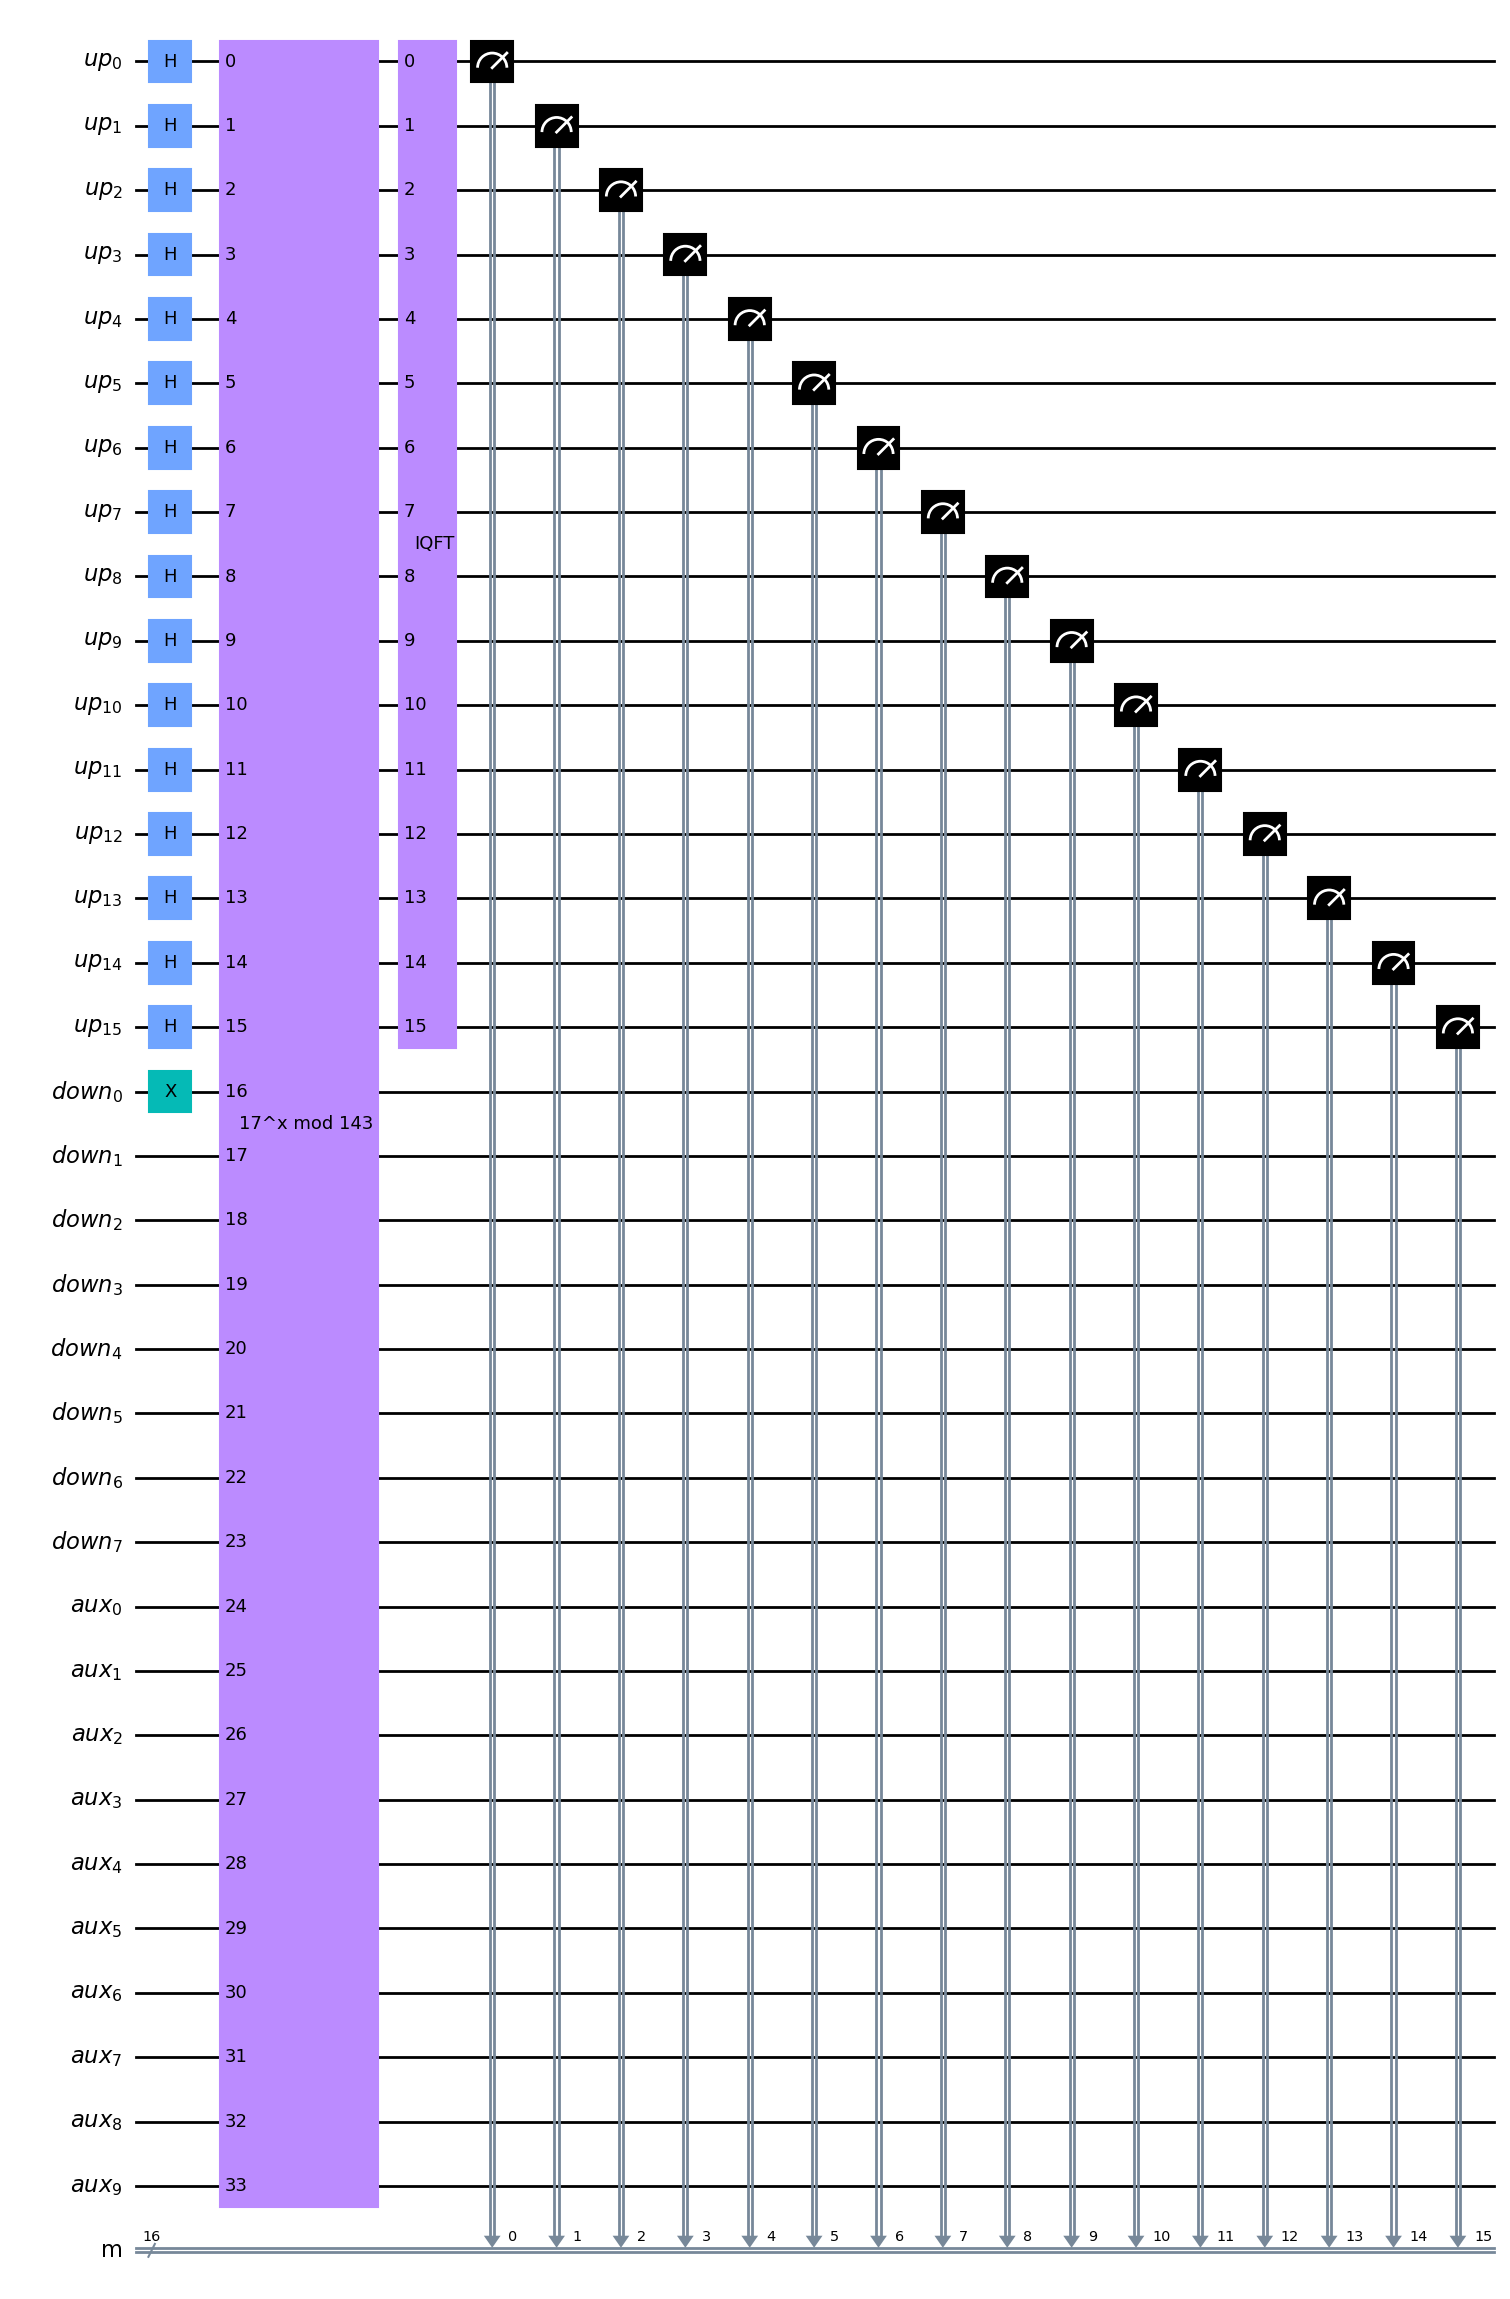

In [34]:
qc_shor = shor.construct_circuit(N, 17, measurement=True)
qc_shor.draw(output='mpl')

In [35]:
print(qc_shor.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{up}_{0} :  } & \lstick{{up}_{0} :  } & \gate{\mathrm{H}} & \multigate{33}{\mathrm{17\string^x\,mod\,143}}_<<<{0} & \multigate{15}{\mathrm{IQFT}}_<<<{0} & \meter & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{up}_{1} :  } & \lstick{{up}_{1} :  } & \gate{\mathrm{H}} & \ghost{\mathrm{17\string^x\,mod\,143}}_<<<{1} & \ghost{\mathrm{IQFT}}_<<<{1} & \qw & \meter & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{up}_{2} :  } & \lstick{{up}_{2} :  } & \gate{\mathrm{H}} & \ghost{\mathrm{17\string^x\,mod\,143}}_<<<{2} & \ghost{\mathrm{IQFT}}_<<<{2} & \qw & \qw & \meter & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{up}_{3} :  } & \lstick

In [36]:
print(f'Computed of qubits for circuit: {4 * math.ceil(math.log(N, 2)) + 2}')
print(f'Actual number of qubits of circuit: {shor.construct_circuit(N).num_qubits}')

Computed of qubits for circuit: 34
Actual number of qubits of circuit: 34


In [39]:
result = shor.factor(N, 12)

In [40]:
print(f"The list of factors of {N} as computed by the Shor's algorithm is {result.factors[0]}")

The list of factors of 143 as computed by the Shor's algorithm is [11, 13]
